<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. パターン認識って何？

## 1.1 パターン認識とは

人間や動物が知覚できる実世界の画像・音・匂いなどの情報を**パターン**という。パターンを既知の概念（クラス）に対応させる処理を**パターン認識**という。

### 画像認識の例

ニューラルネットワークの事前学習モデルVGG16を用いて物体認識（[Imagenet 1000クラス](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)）を行う。

In [ ]:
# サンプル画像を取得
!wget https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg

--2022-05-11 00:06:15--  https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg [following]
--2022-05-11 00:06:15--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82429 (80K) [image/jpeg]
Saving to: ‘fruits.jpg’

fruits.jpg          100%[===================>]  80.50K  --.-KB/s    in 0.001s  

2022-05-11 00:06:15 (65.0 MB/s) - ‘fruits.jpg’ saved [82429/82429]



49152/35363 [=========================================] - 0s 0us/step
('n07749582', 'lemon', 0.9289435)
('n07747607', 'orange', 0.069215)
('n07753275', 'pineapple', 0.00048059414)
('n07753592', 'banana', 0.00039395003)
('n07717410', 'acorn_squash', 0.0002598646)
('n07716906', 'spaghetti_squash', 0.00013888965)
('n07718472', 'cucumber', 0.00011660664)
('n07753113', 'fig', 8.2255254e-05)
('n07742313', 'Granny_Smith', 8.0220576e-05)
('n07716358', 'zucchini', 7.096982e-05)


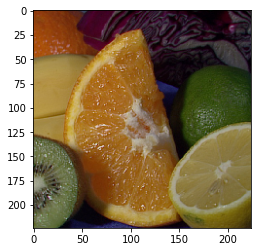

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import sys
import matplotlib.pyplot as plt

"""
ImageNetで学習済みのVGG16モデルを使って入力画像のクラスを予測する
"""

# 学習済みのVGG16をロード
model = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

# 画像ファイルを読み込む
# 画像サイズをVGG16のデフォルトである224x224にリサイズ
filename = 'fruits.jpg'
img = image.load_img(filename, target_size=(224, 224))
plt.imshow(img)

# 読み込んだPIL形式の画像をarrayに変換
x = image.img_to_array(img)

# 3次元テンソル（rows, cols, channels) を
# 4次元テンソル (samples, rows, cols, channels) に変換
# 入力画像は1枚なのでsamples=1でよい
x = np.expand_dims(x, axis=0)

# Top-10のクラスを予測する
# VGG16の1000クラスはdecode_predictions()で文字列に変換される
preds = model.predict(preprocess_input(x))
results = decode_predictions(preds, top=10)[0]
for result in results:
    print(result)

### 音声認識の例

Pythonの音声認識パッケージで日本語音声認識を行う。

In [ ]:
!pip install speechrecognition

     |████████████████████████████████| 32.8 MB 79.3 MB/s 


In [ ]:
# サンプル音声を取得
!wget https://github.com/kan-bayashi/asj-espnet2-tutorial/raw/master/static/audios/ja_sample.wav

--2022-05-11 00:06:42--  https://github.com/kan-bayashi/asj-espnet2-tutorial/raw/master/static/audios/ja_sample.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kan-bayashi/asj-espnet2-tutorial/master/static/audios/ja_sample.wav [following]
--2022-05-11 00:06:42--  https://raw.githubusercontent.com/kan-bayashi/asj-espnet2-tutorial/master/static/audios/ja_sample.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145244 (142K) [audio/wav]
Saving to: ‘ja_sample.wav’

ja_sample.wav       100%[===================>] 141.84K  --.-KB/s    in 0.003s  

2022-05-11 00:06:42 (54.2 MB/s) - ‘ja_sample.wav

In [ ]:
import IPython.display
IPython.display.Audio("ja_sample.wav")

In [ ]:
import speech_recognition as sr

filename = 'ja_sample.wav'
r = sr.Recognizer()
with sr.AudioFile(filename) as source:
    audio = r.record(source)
print("認識結果：" + r.recognize_google(audio, language='ja-JP'))

認識結果：演奏会の切符は当事務所で販売しています


## 1.2 パターン認識システムの構成

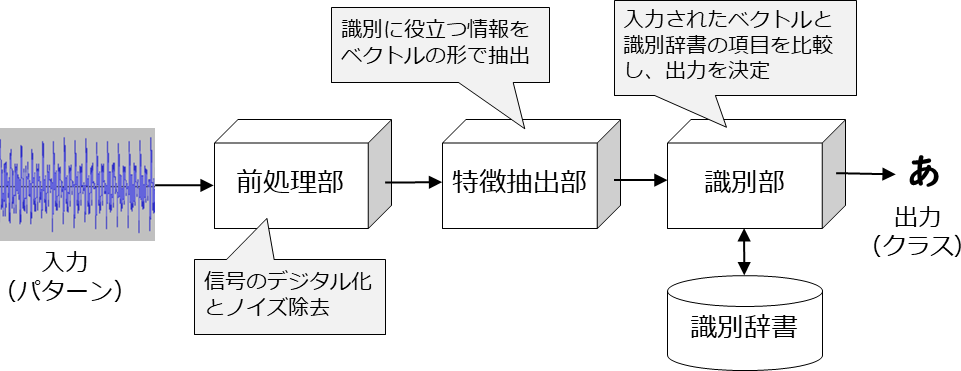

## 1.3 前処理部

アナログ信号をデジタル信号に変換する。信号レベルで実行可能なノイズ除去処理を行うこともある。詳細は第2章を参照。

## 1.4 特徴抽出部

デジタル化された入力の情報から、識別に役立つ特徴を取り出してベクトルとする。この処理によって、入力されたデータは特徴空間上の1点として表すことができる。詳細は第3章を参照。

### irisデータで3dプロット

irisデータはアヤメの種類を識別するための、花びら・萼それぞれの幅・長さからなる4次元データである。このデータから3次元を選び出し、特徴空間上にプロットして可視化する。

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2022-05-11 00:07:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-05-11 00:07:02 (78.2 MB/s) - ‘iris.data’ saved [4551/4551]



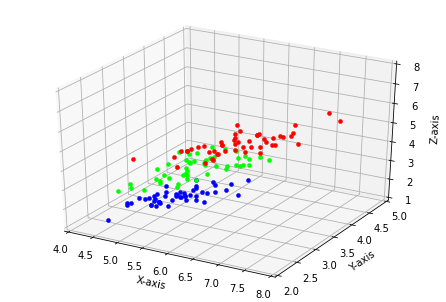

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# ファイル読み込み
df = pd.read_csv('iris.data', header=None, names=['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'target'])
d = df.to_numpy()

# グラフ作成
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# 表示範囲の設定
ax.set_xlim(4, 8)
ax.set_ylim(2, 5)
ax.set_zlim(1, 8)

# 抽出条件設定
d0 = d[d[:,4] == 'Iris-setosa']
d1 = d[d[:,4] == 'Iris-versicolor']
d2 = d[d[:,4] == 'Iris-virginica']

# グラフ描画
ax.plot(d0[:,0], d0[:,1], d0[:,2], "o", color="#0000ff", ms=4, mew=0.5)
ax.plot(d1[:,0], d1[:,1], d1[:,2], "o", color="#00ff00", ms=4, mew=0.5)
ax.plot(d2[:,0], d2[:,1], d2[:,2], "o", color="#ff0000", ms=4, mew=0.5)
plt.show()

## 1.5 識別部と識別辞書

識別部は特徴ベクトルを入力として識別結果のクラスを出力する。識別に先立って、学習用のデータからそれぞれのクラスを識別するための情報やモデルを何らかの方法で獲得して識別辞書に格納しておき、この情報を用いて識別を行う。

### 最近傍決定則

各クラスの学習データからお手本となるベクトル（プロトタイプ）を求め、入力データとそれらのプロトタイプとの距離を計算し、もっとも近いプロトタイプが属するクラスを識別結果とする方法。

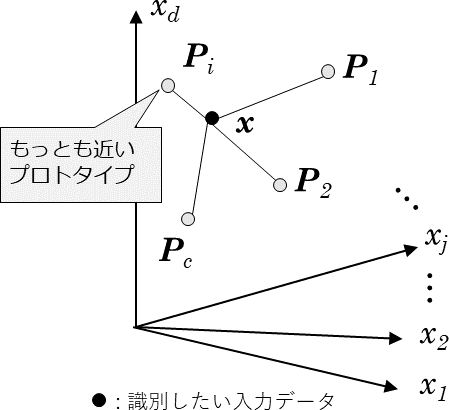

## 例題1.1

例題1.1の処理をPythonでコーディングせよ．


In [ ]:
import numpy as np

proto = np.array(
    [[[0,1,1,1,0],
      [1,0,0,0,1],
      [1,0,0,0,1],
      [1,0,0,0,1],
      [0,1,1,1,0]],
     [[0,0,1,0,0],
      [0,0,1,0,0],
      [0,0,1,0,0],
      [0,0,1,0,0],
      [0,0,1,0,0]],
     [[0,1,1,1,1],
      [1,0,0,1,0],
      [0,0,1,0,0],
      [0,1,0,0,0],
      [1,1,1,1,1]],
     [[0,1,1,1,0],
      [1,0,0,0,1],
      [0,0,1,1,0],
      [1,0,0,0,1],
      [0,1,1,1,0]],
     [[0,0,1,0,0],
      [0,1,0,0,0],
      [1,0,0,1,0],
      [1,1,1,1,1],
      [0,0,0,1,0]]])
x = np.array(
     [[0,0,0,1,0],
      [0,0,0,1,0],
      [0,0,0,1,0],
      [0,0,0,1,0],
      [0,0,0,1,0]])

# 以下にxとproto[i]との距離を求めて最小値のインデックスを表示する
# コードを記述する
